# 线槽大小确定和超导线选材

## 问题提出

2020年12月18日，确定了新的 CCT 参数，开始调整线槽大小和超导线选材。

### 新的 CCT 参数，二极 CCT 和四极 CCT，总电流都略微上升

二极 CCT 9206A --> 9489A

四极 CCT 7037A --> 7335A

### 原先的槽设计（2.5mm \* 11mm）和导线分布（2\*11）不合理

原先槽设计，导致骨架在槽位置的厚度只有 3 mm，偏低

导线分布 2*11，这个 11 太多了。

### 新的设计要求

1. 骨架在槽位置的厚度应为 3-5 mm

2. 超导线选在偏保守，原本选材的导线太细，可以选粗一点的，做到 2*8 或者 6*2，单线尺寸可以到 1.7mm。槽宽度可以到 4mm


## 调整中出现的问题

详细计算 rib 宽度后法线，当槽宽度为 4mm 时，rib 最小宽度只有 0.114mm，所以线材 1.7mm 不合适。如下

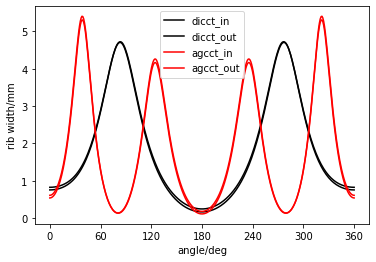

In [1]:
# rib 宽度

import rib宽度计算器

西部超导线数据如下

<img src="img/西部超导数据.jpg" width=60%></img>

之前选的是 11 号线材，1.1*1.1，线槽宽度 2.5mm

现在选15号，1.5*1.5，初步估计工作电流 600A，裕度~30%（如下图），需要opera计算确认

二极CCT需要16匝，2*8  （直接对应槽 3mm*12mm，可能还需要留一定的余量）（电流密度）

四极CCT需要14匝，2*7

<img src="img/西部超导选型.jpg" width=50%></img>


## 博士论文的启示

博士论文 9 章

一个弯转90度，半径0.775m，孔径250mm的上游二极CCT

中心二极磁场 3.0 T，导线上最大磁场 3.93T 

他认为rib宽度只要大于0.381mm（只是从机械加工上限制，没有考虑洛伦兹力压强）

<img src="img/博士论文rib极限.jpg" width=30%></img>

<img src="img/博士论文rib极限描述.jpg" width=50%></img>


## 补充导线上最强磁场计算数据

使用 opera 得到导线上最强磁场计算数据

导线几何为 3.2mm * 11mm

二极 CCT 上最大磁场 4.103T

四极 CCT 上最大磁场 4.597T

如下图

<img src="img/opera导线附近最大磁场_全CCT.jpg" width=20%></img>

<img src="img/opera导线附近最大磁场_二极CCT.jpg" width=20%></img>

<img src="img/opera导线附近最大磁场_四极CCT.jpg" width=20%></img>


## 选用新的超导线厂商

<img src="img/新超导线厂商资料.jpg" width=80%></img>

1.50 的线材，带上绝缘后，直径 1.55mm，对于槽宽度 3.2mm，有点不够

下面测试 1.25 线材，绝缘直接 1.3mm，工作裕度计算

In [2]:
import matplotlib.pyplot as plt
import math
import numpy


# 超导线横截面积
line_cross_section = math.pi * ((1.25/2)**2)
# 导线数据，电流 - 磁场
product_data_current = [795, 620, 445, 275] # r = 1.25
product_data_magnet = [6, 7, 8, 9] # r = 1.25

# 总电流
current_dicct = 9488.615
current_agcct = 7334.914

# 最大磁场
max_magnet_dicct = 4.102784
max_magnet_agcct = 4.596925

def work_line(current_density, max_manget, end_current_density):
    # 工作点
    plt.plot([max_manget], [current_density], 'r.', markersize=10)
    # 工作线
    plt.plot([0, max_manget], [0, current_density], 'r-')
    # 延长线
    plt.plot([0, end_current_density*max_manget/current_density], [0, end_current_density], 'r--')
    
def product_line(product_data_magnet, product_data_current):
    # plt.plot(product_data_magnet, product_data_current,"k--")
    plt.plot(product_data_magnet, product_data_current,"k.", markersize=10)
    plt.xlim(0, 10)
    plt.ylim(0, 1200)
    plt.xlabel('B/T')
    plt.ylabel('I/A')

    # 拟合
    fit = numpy.polyfit(product_data_magnet, product_data_current,2)
    f = numpy.poly1d(fit)
    xs = numpy.linspace(0, 10,1000)
    ys = f(xs)
    plt.plot(xs,ys,'k--')

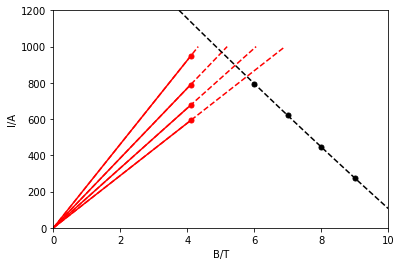

In [3]:
# 二极CCT，
work_line(current_dicct / (2*8), max_magnet_dicct, 1000) # 640
work_line(current_dicct / (2*7), max_magnet_dicct, 1000) # 640
work_line(current_dicct / (2*6), max_magnet_dicct, 1000) # 640
work_line(current_dicct / (2*5), max_magnet_dicct, 1000) # 640

product_line(product_data_magnet, product_data_current)
plt.show()

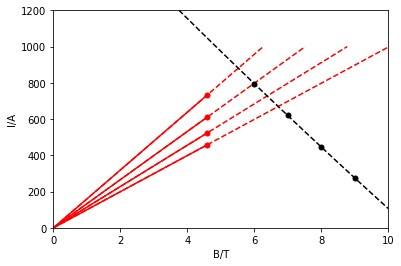

In [4]:
work_line(current_agcct / (2*8), max_magnet_agcct, 1000) # 640
work_line(current_agcct / (2*7), max_magnet_agcct, 1000) # 640
work_line(current_agcct / (2*6), max_magnet_agcct, 1000) # 640
work_line(current_agcct / (2*5), max_magnet_agcct, 1000) # 640

product_line(product_data_magnet, product_data_current)
plt.show()

## 确定超导线数目(这里选材有误！把电流密度当作了单股线电流)

从上到下，分别是 5\*2 6\*2 7\*2 8\*2

### 二极CCT
<img src="img/二极CCT工作线选择.jpg" width=80%></img>


### 四极CCT
<img src="img/四极CCT工作线选择.jpg" width=80%></img>

都取 7\*2 是可行的

宽度 1.3\*2 = 2.6 <3.2

深度 1.3\*7 = 9.1 < 11，减到 10mm 也可以，这样槽骨架厚度 5 mm

## 总结

<img src="img/工作裕度图.jpg"></img>